<a href="https://colab.research.google.com/github/lakummahesh/Supervised-ML-Capstone-Project-Classification-Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction Project**

## The problem Statement:

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

## Variables:


Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

**Data Description:**

**Demographic:**

1. Sex: male or female("M" or "F")
2. Age: Age of the patient; (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3. Education: The data here is divided in to 4 classes corresponding to some level of education. These classes are indicated by numerical values "1", "2", "3" and "4".

**Behavioral:**

4. is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
5. Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history):**

6. BP Meds: whether or not the patient was on blood pressure medication (Nominal)
7. Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
8. Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
9. Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current):**

10. Tot Chol: total cholesterol level (Continuous)
11. Sys BP: systolic blood pressure (Continuous)
12. Dia BP: diastolic blood pressure (Continuous)
13. BMI: Body Mass Index (Continuous)
14. Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
15. Glucose: glucose level (Continuous)


**Predict variable (desired target):**
16. 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - dichotomous variable

The approach to predict the CHD (Coronary Heart Disease) from the available data will be done in the following steps:
1. Mount the drive and import the data.
2. View the data
3. Clean the data
>  3.1 Check for duplicate values and remove if any.\
   3.2 Check for missing values in each feature and deal with it.
   >> 3.2.1 Approach1: Drop the data with missing values.\
      3.2.2 Approach2: Replace the missing values with appropriate values.
   >> 
  3.3 Check the data again and see if relevant information is true and none of the features contradict each other.\
  3.4 Perform Label Encoding.\
  3.5 Deal with Outliers.
>

4. Perform EDA (Exploratory Data Analysis) to get a better insight of how the variables are linked.
5. Model Training.\
Here, we have trained the  following models with our data to draw out the final conclusion.
  1. Logistic Regression
  2. Random Forest
  3. XGBoost Classifier
  4. KNN Classifier
  5. Support Vector Machine (SVM)

# Mounting the drive and importing the data.

In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Mounting Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Supervised-ML-Capstone-Project-Classification-Cardiovascular-Risk-Prediction-Mahesh-Lakum/data_cardiovascular_risk.csv'
df = pd.read_csv(path)

# Viewing the data.

In [4]:
# Checking the shape of data
df.shape

(3390, 17)

In [6]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [8]:
# Checking the amount of null values and data types of each features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
# Getting the column names
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
# To check for duplicate entries.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

Here, we see that the number of unique values in the 'id' feature is same as the number of rows. Hence, all the entries are unique. There are no duplicate entries.

In [11]:
# Getting the basic stats of the dataset.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


# Cleaning the data.

Here, we will do the following:
1. Find and drop the irrelevant/ redundant features.
2. Find and drop the duplicate entries.
3. Find and deal with the missing values in the dataset.

In [12]:
# Drop the id column as it is redundant data for our analysis
df.drop("id",axis=1,inplace=True)

In [13]:
# Check and drop the duplicate entries in the data.
# As such this step can be removed as we have already seen earlier that there are no duplicate entries in the data.
# This is done just for the sake of uniformity and reusability of the code.
df.drop_duplicates(inplace=True)

In [14]:
#Check for the Missing values in the dataset.
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

A few features as shown above do have missing values. We need to deal with these in order to make the data clean and usable for analysis.
We have tried two approaches for this.
1. Drop the data corresponding to missing values.
2. Replace the missing values with relevant data.

# Approach 1: Dropping the missing values:
The maximum amount of data missing is for the feature 'glucose'. It is 304, which is less than 10% of the total data. Hence, here we consider dropping the missing data as safe.

In [15]:
# Creating a copy of the dataframe
df1 = df.copy()

In [16]:
# Dropping all the entries corresponding to the data with missing values
df1.dropna(axis=0,inplace=True)

In [17]:
# Checking the new shape of the dataset
df1.shape

(2927, 16)

In [18]:
# Just confirming if all the missing data is dropped
df1.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Approach 2: Replacing the missing values with relevant data:
To do this, first we create a copy of the original dataframe and then we check for the weightage of the categorical data in the dependent variable.

In [19]:
# Creating a copy of dataframe from source data
df2 = df.copy()

In [20]:
# Cheking null values in each Features
df2.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [21]:
# For Dependent Variable cheking the value counts of each class, means the number of data for risk and no risk
df2.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

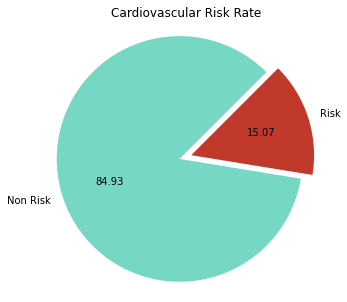

In [22]:
# Plotting the pie chart of dependent variable to check the proportion of each class in the data
plot_labels = 'Non Risk',"Risk"
plot_colors = ['#76D7C4','#C0392B']
explode_size = (0,0.1)
plt.figure(figsize=(5,5))
plt.pie(df2['TenYearCHD'].value_counts(), labels = plot_labels, autopct = '%.2f', startangle = 45, colors = plot_colors, explode = explode_size)
plt.title("Cardiovascular Risk Rate")
plt.axis('equal')
plt.show()

From the above we can say that:
1. In the data, out of 3390 entries only 511 entries correspond to positive, i.e. indicating the Risk of Cardiovascular disease. This amounts to 15% of the total data. Which is quite less in proportion. Hence, before we drop the data with missing values, we need to look for the proportion of data corresponding to this class.
2. The dependent variable is categorical in nature. Hence, this problem can be considered as a classification problem where we need to predict the possibility of occurance of either of the two events.
3. Looking at the percentage of classes, we can say that there is a huge class imbalance. We will need to deal with this before training the machine learning models.

In [23]:
# Total NaN values in the data
nan_total = (df2.isnull().sum()).sum()
nan_total

510

Now, we want to check that how much data correspnding to the missing values belong to the minority class of dependent variable. This is important because if we want to know the amount of minority data being affected by this.

In [24]:
# Finding the percentage of weightage of each feature with missing values.
rnan_education = df2[(df2["TenYearCHD"]==1) & (df2.education.isnull())].shape
rnan_cigsPerDay = df2[(df2["TenYearCHD"]==1) & (df2.cigsPerDay.isnull())].shape
rnan_BPMeds = df2[(df2["TenYearCHD"]==1) & (df2.BPMeds.isnull())].shape
rnan_totChol = df2[(df2["TenYearCHD"]==1) & (df2.totChol.isnull())].shape
rnan_BMI = df2[(df2["TenYearCHD"]==1) & (df2.BMI.isnull())].shape
rnan_heartRate = df2[(df2["TenYearCHD"]==1) & (df2.heartRate.isnull())].shape
rnan_glucose = df2[(df2["TenYearCHD"]==1) & (df2.glucose.isnull())].shape

In [25]:
# Sum up the above to get the total percentage:
rnan_total = rnan_education[0] + rnan_cigsPerDay[0] + rnan_BPMeds[0] + rnan_totChol[0] + rnan_BMI[0] + rnan_heartRate[0] + rnan_glucose[0]

print(f'The total NaN values in the data are {nan_total} of which {rnan_total} corresponds to the Risk Class.')

The total NaN values in the data are 510 of which 75 corresponds to the Risk Class.


In [26]:
# Finding percentage of data corresponding to Risk class:
print(f'The percentage of NaN values in the data that corresponds to the Risk Class is {rnan_total/3390*100}.')

The percentage of NaN values in the data that corresponds to the Risk Class is 2.2123893805309733.


This means that if we drop the NaN values, we will lose 2.21% of the data corresponding to the Risk class, which consists of just 15% of the entire data. Hence, dropping this might impact the final results. Hence, we will have to replace the data with some relevant values.
For categorical variables we will use mode of the data while for numerical variables we will use median of the data.

# Replacing the values:

In [27]:
# Filling the missing values with median values for numeric variables and mode for categorical variables.
df2['glucose'] = df2['glucose'].fillna(df2['glucose'].median())
df2['education'] = df2['education'].fillna(df2['education'].mode()[0])
df2['BPMeds'].fillna(df2['BPMeds'].mode()[0],inplace = True)
df2['cigsPerDay'] = df2['cigsPerDay'].fillna(df2['cigsPerDay'].median())
df2['totChol'] = df2['totChol'].fillna(df2['totChol'].median())
df2['BMI'] = df2['BMI'].fillna(df2['BMI'].median())
df2['heartRate'] = df2['heartRate'].fillna(df2['heartRate'].median())

In [28]:
# Just confirming if all the missing data are dropped
df2.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [29]:
# While viewing the data, it was observed that some values in the variable 'cigsPerDay' which were 0, corresponded to the value 'YES' in the variable 'is_smoking'
# Hence, we will have to change those 'YES' values to 'NO'
df2.loc[(df2['is_smoking'] == 'YES') & (df2['cigsPerDay'] == 0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,F,YES,0.0,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,0.0,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,0.0,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,78.0,0
491,61,1.0,F,YES,0.0,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,0.0,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,M,YES,0.0,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,F,YES,0.0,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,F,YES,0.0,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,F,YES,0.0,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,F,YES,0.0,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


In [30]:
# Counting the number of such entries
a = (df2.loc[(df2['is_smoking'] == 'YES') & (df2['cigsPerDay'] == 0)])
a.shape

(22, 16)

In [31]:
# Total value counts of 'YES' and 'NO' before doing the correction
df2['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [32]:
# Correcting the 'is_smoking' variable.
df2.loc[(df2['is_smoking'] == 'YES') & (df2['cigsPerDay'] == 0), 'is_smoking'] = 'NO'

In [33]:
# Total value counts of 'YES' and 'NO' after doing the correction
df2['is_smoking'].value_counts()

NO     1725
YES    1665
Name: is_smoking, dtype: int64

Hence, successfully converted all the 22 entries.

# Label Encoding:
We will have to use this to convert the categorical data with textual information to useful numerical values for the ease of analysis.
We will use One Hot Encoding for this.

In [34]:
# Replacing categorical data with numeric.
df2['sex']= df2['sex'].apply(lambda x: 1 if x=='M' else 0)                  # M = 1, F = 0
df2['is_smoking']= df2['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)  # YES = 1, NO = 0

In [35]:
# creating a list that contains all the numerical features
numerical_columns  = [i for i in df2.columns if len(df2[i].unique())>5]
print(list(numerical_columns))

['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [36]:
# creating a list that contains all the categorical features
categorical_columns = [i for i in df2.columns if len(df2[i].unique())<5]

categorical_columns.remove('TenYearCHD') # dropping the target variable i.e. TenYearCHD
print(list(categorical_columns))

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


# Dealing with the Outliers.

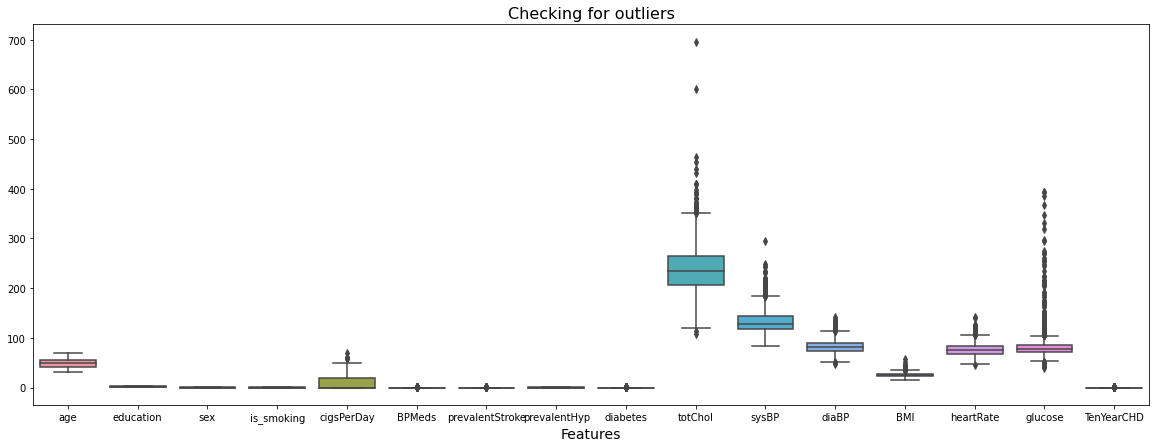

In [37]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df2)
plt.title('Checking for outliers', size=16)
plt.xlabel('Features',size=14)
plt.show()

We see that there are a number of outliers for the features 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate' and 'glucose'. We need to deal with all these Outliers.\
However, we need to know the impact of each of these outliers before removal. Hence, we calculate the Risk of outlier removal for all the features.

In [38]:
# Creating a function to calculate the risk of outlier removal
def outlier_removal_risk_calculator(columns):
  # Creating a dataframe to store the calculated values in a tabular format 
  outlier_df = pd.DataFrame(columns=['Column', 'Upper Limit', 'Lower Limit', 'Upper Removal', 'Lower Removal', '% of Risk'])
  
  for column in columns:
    q3 = df2[column].quantile(0.75) # Get the third quartile
    q1 = df2[column].quantile(0.25) # Get the first quartile
    iqr = q3 - q1 # Calculate Inter Quartile Range
    upper_limit = q3 + (1.5* iqr) # To calculate and define the upper limit of removal
    lower_limit = q1 - (1.5* iqr) # To calculate and define the lower limit of removal
  
    upper_removal_count = dict(df2[df2[column] > upper_limit]['TenYearCHD'].value_counts()) # Counting the number of outliers of each class of dependent variable wrt upper limit
    lower_removal_count = dict(df2[df2[column] < lower_limit]['TenYearCHD'].value_counts()) # Counting the number of outliers of each class of dependent variable wrt lower limit

    input_dict = {'Column' : column,
                  'Upper Limit' : upper_limit,
                  'Lower Limit' : lower_limit,
                  'Upper Removal' : upper_removal_count,
                  'Lower Removal' : lower_removal_count,
                  '% of Risk' : upper_removal_count[1]*100/len(df2[df2[column] > upper_limit])}
                  
    outlier_df = outlier_df.append(input_dict, ignore_index = True)

  return outlier_df

In [39]:
# Applying the above function to get the risk value
outlier_removal_risk_calculator(['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'])

,Column,Upper Limit,Lower Limit,Upper Removal,Lower Removal,% of Risk
0,cigsPerDay,50.00000,-30.00000,"{0: 7, 1: 2}",{},22.222222
1,totChol,351.00000,119.00000,"{0: 30, 1: 11}","{0: 1, 1: 1}",26.829268
2,sysBP,184.50000,76.50000,"{0: 64, 1: 41}",{},39.047619
3,diaBP,113.25000,51.25000,"{0: 32, 1: 23}","{1: 2, 0: 1}",41.818182
4,BMI,35.44875,15.57875,"{0: 62, 1: 17}",{},21.518987
5,heartRate,105.50000,45.50000,"{0: 50, 1: 13}",{0: 1},20.634921
6,glucose,104.50000,52.50000,"{0: 143, 1: 57}","{0: 13, 1: 1}",28.500000


From this table we can see the Risk percentage of outlier removal for each variable.
The Upper Removal shows the number of values lying above the Upper limit. The data is represented as a dictionary of 0,1, which means the number of points corresponding to No Risk and Risk class respectively. Similar is indicated for the lower limit the column Lower Removal.
If we decide to remove all these outliers, then a minimum of 57 entries corresponding to the miniority class ('Risk' - '1') will be lost. Since, there is already prevalent class imbalance, we cannot afford to lose any data corresponding to the minority class.

# EDA (Exploratory Data Analysis)

Let us first plot the coutplots for all the features.
We will plot it for categorical and numerical variables separately.

# Univariate Analysis

## **1. Categorical Variables**

In [40]:
# Creating a function to plot the countplots of categorical columns
def countplot_categorical(columns):

  fig, axes = plt.subplots(len(columns) , figsize=(10,22))  
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.countplot(ax = axes[i], data = df2, x = column)

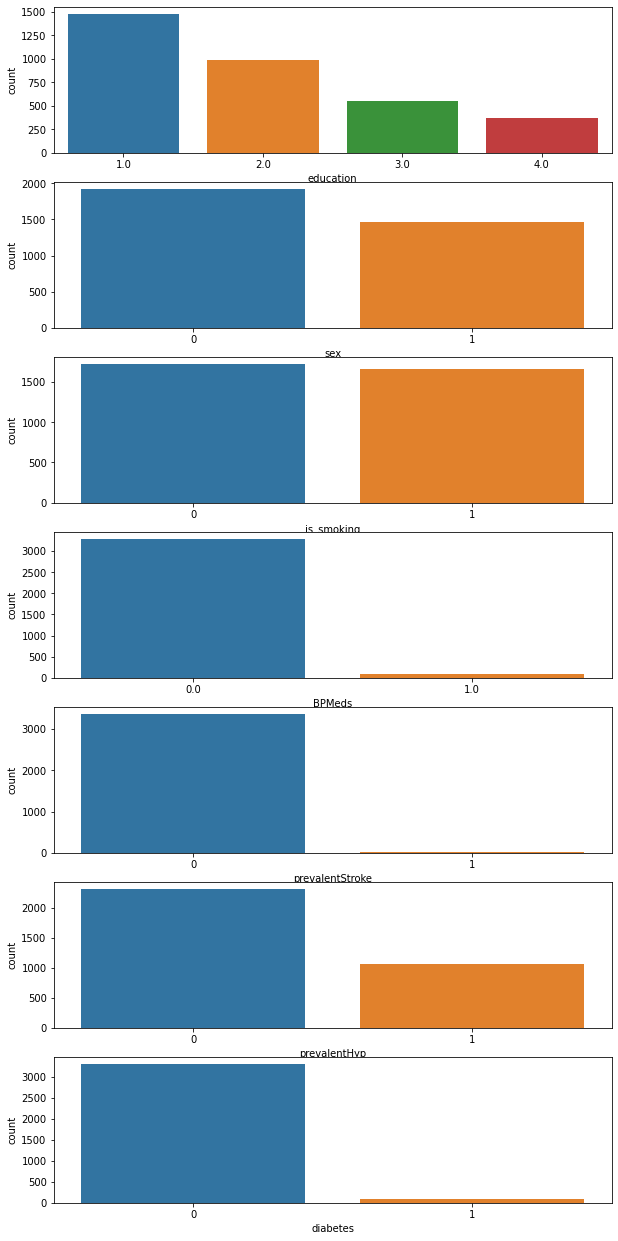

In [41]:
countplot_categorical(categorical_columns)

From the above countplot graphs of the categorical variables we deduce the following:
1. Majority of the people in the data belong to the 1st class of education which amounts to about 1500. As the class count increases, the number of people reduces.
2. Number of females in the data is more than men by nearly 500 counts.
3. The data contains nearly same amount of non-smokers and smokers.
4. Very few people are on BP medication. Above 3000 people are free from those medicines.
5. Majority of the people have not suffered a stroke previously.
6. About 1/3rd people have hypertension. This data amounts to more than 1000 counts.
8. Very few people have diabetes. Over 3000 people are free from diabetes.

## **2. Numerical Variables**

In [42]:
# Creating a function to plot distribution of numerical columns
def countplot_numerical(columns):
  
  fig, axes = plt.subplots(len(columns) ,figsize=(10,30))
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.histplot(ax = axes[i], x = df2[column], kde = True)

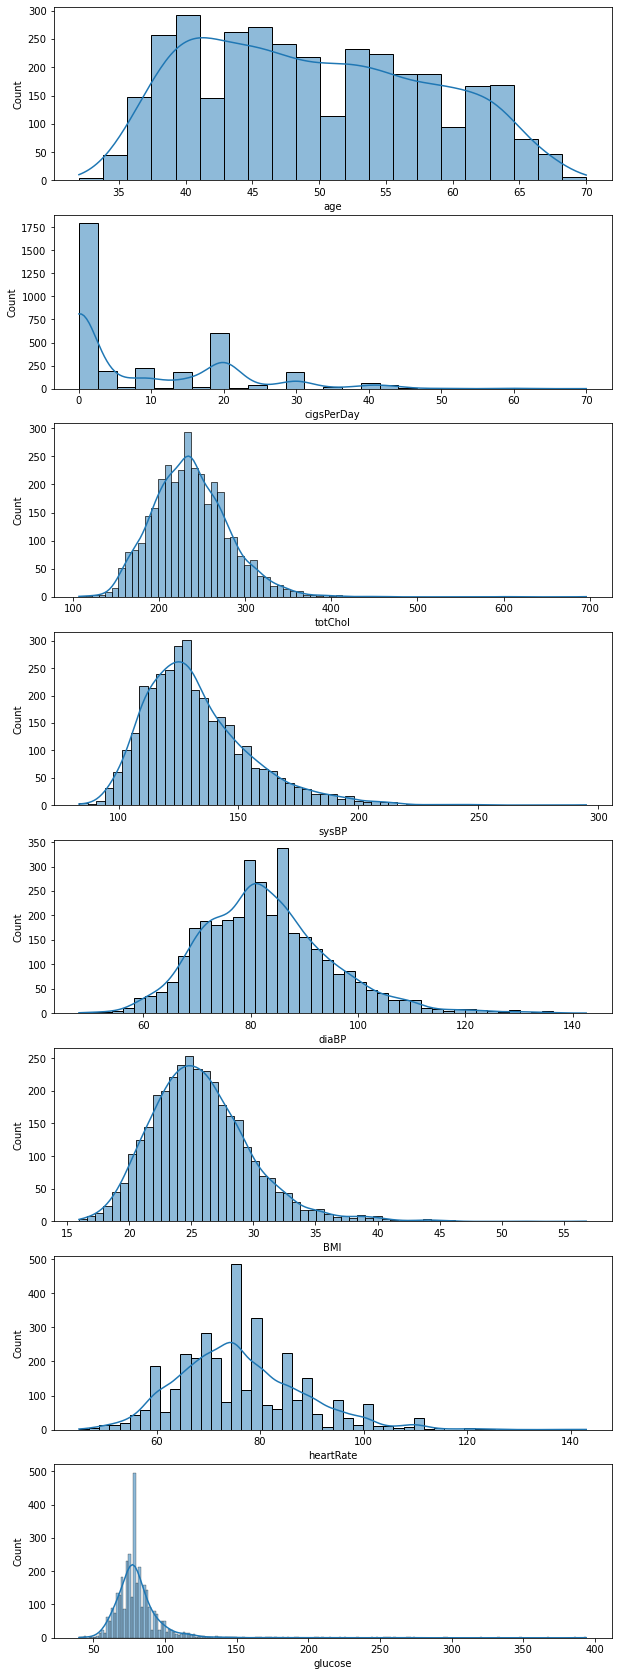

In [43]:
# Using the function to plot graphs for numerical columns
countplot_numerical(numerical_columns)

From the above histogram plots of the numerical variables we deduce the following:
1. In the data, age ranges from 35 years to 70 years, of which majority people belong to the group of 40 - 45. Overall the graph is mostly normally distributed.
2. The data contains majority of the values of non smoker as zero cigarettes has the highest count. Other notable peaks are of 20 and 10 cigarettes per day.
3. The total Cholestrol follows a near normal distribution which ranges form 100 to 400 units, with peak nearing 250 units.
4. Systolic BP appears to be slightly left skewed with range 100 to 200 units.
5. Diastolic BP appears to be near normal dostribution with range 60 to 120 units.
6. The BMI has a range of 16 to 40 with peak at 25. It follows normal distribution.
7. The Heart rate ranges from 35 to 110 with a peak at 75.
8. Glucose is left skewed graph with peak at about 75. It spans from 50 to 125.

## **3. Plot of Dependant variable vs. variables**

From the above exercise we see that we cannnot tell much about the dependent variable wrt each feature. Hence, we will plot a bar chart of each variable vs the dependent variable. This will give an idea of the count or occurances of the No-Risk class ('0') and Risk class ('1') in that feature.

<Figure size 720x432 with 0 Axes>

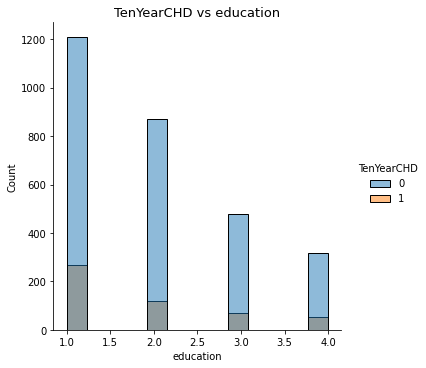

<Figure size 720x432 with 0 Axes>

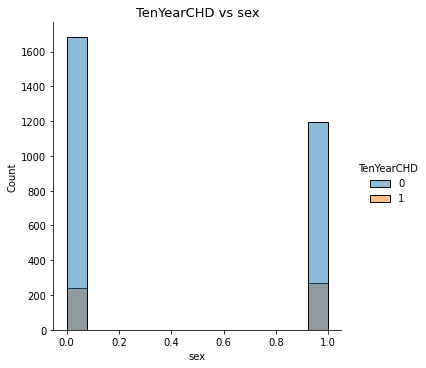

<Figure size 720x432 with 0 Axes>

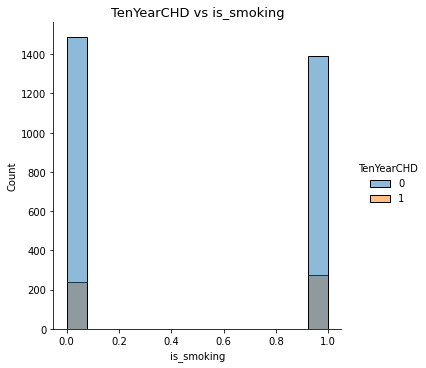

<Figure size 720x432 with 0 Axes>

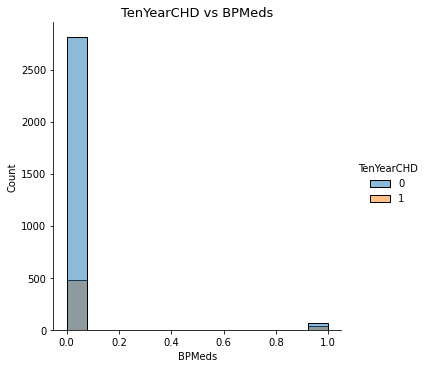

<Figure size 720x432 with 0 Axes>

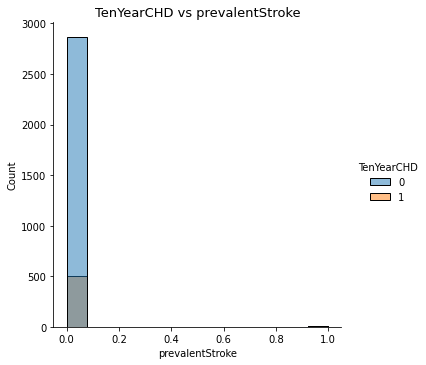

<Figure size 720x432 with 0 Axes>

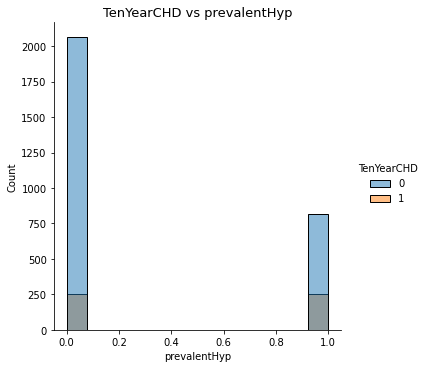

<Figure size 720x432 with 0 Axes>

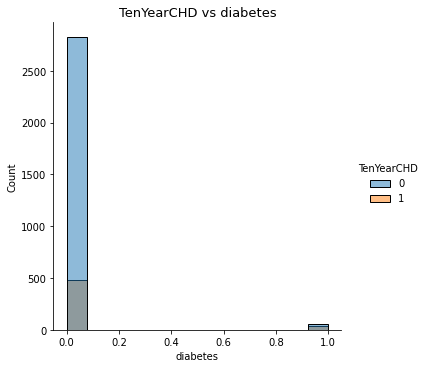

In [44]:
# Plotting a graph of each variable against the dependent variable for better understanding.
# First we will do it for the categorical variables.
for i, j in enumerate(categorical_columns):
  plt.figure(figsize = (10,6))
  sns.displot(data = df2, x=j, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {j}', fontsize=13)
  plt.show()

<Figure size 720x432 with 0 Axes>

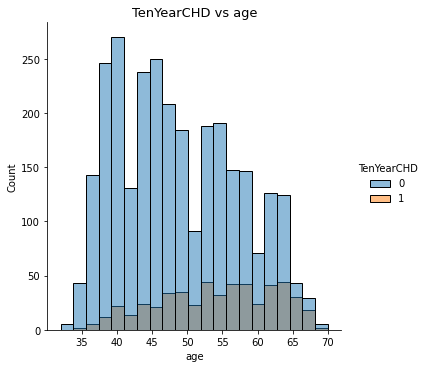

<Figure size 720x432 with 0 Axes>

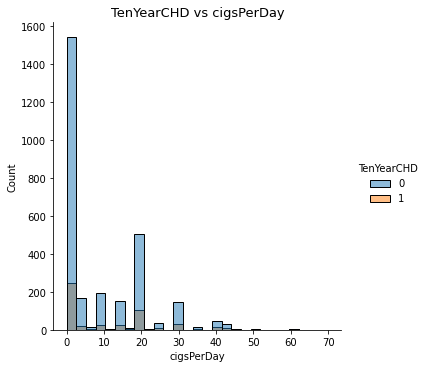

<Figure size 720x432 with 0 Axes>

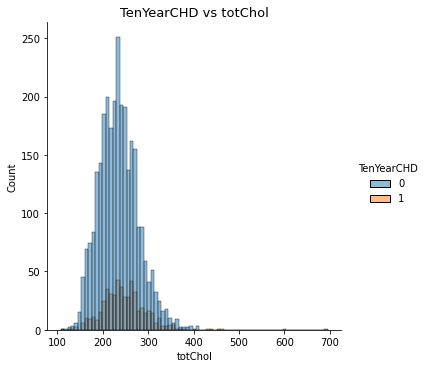

<Figure size 720x432 with 0 Axes>

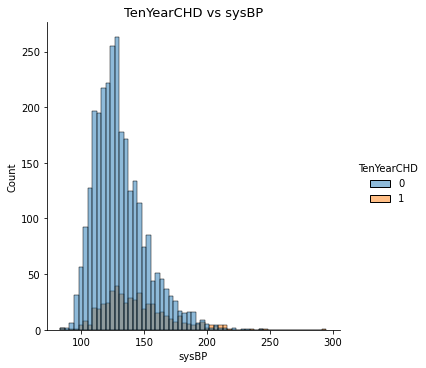

<Figure size 720x432 with 0 Axes>

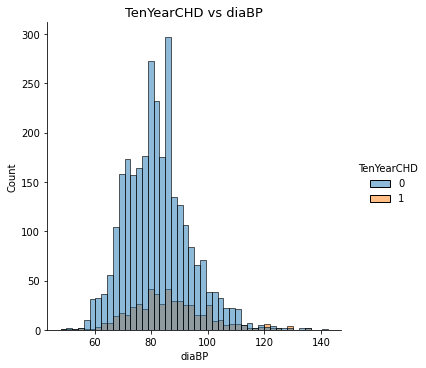

<Figure size 720x432 with 0 Axes>

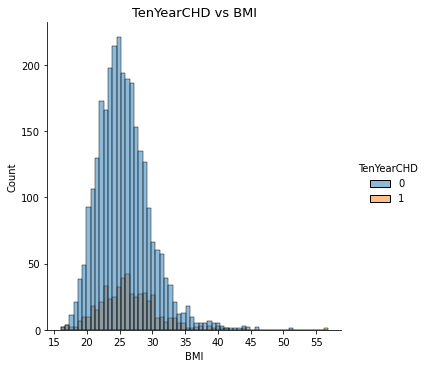

<Figure size 720x432 with 0 Axes>

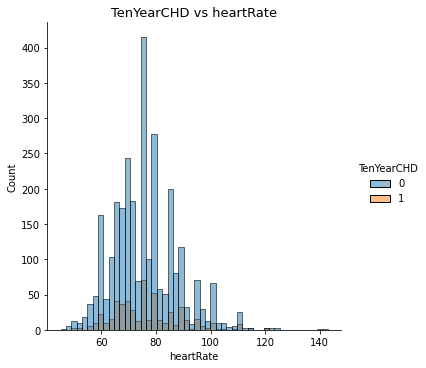

<Figure size 720x432 with 0 Axes>

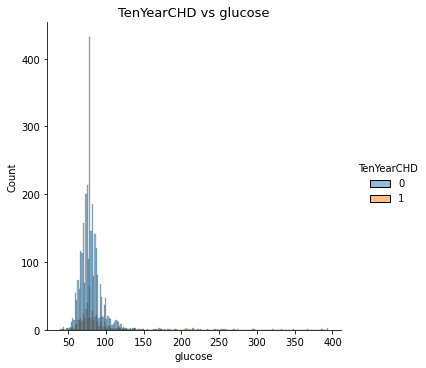

In [45]:
# Now for the numerical variables.
for i, j in enumerate(numerical_columns):
  plt.figure(figsize = (10,6))
  sns.displot(data = df2, x=j, hue="TenYearCHD")
  plt.title(f'TenYearCHD vs {j}', fontsize=13)
  plt.show()

Combined observation of all these plots.:
Looking at the spectrum of the data, we can say that this is an unbiased data. It consists the data of both healthy and unhealty patients. Hence, we need to understand each feature properly and their correlation and dependence of the dependent variable on them. For this lets look at the pair plot of each feature.

# Bivariate Analysis

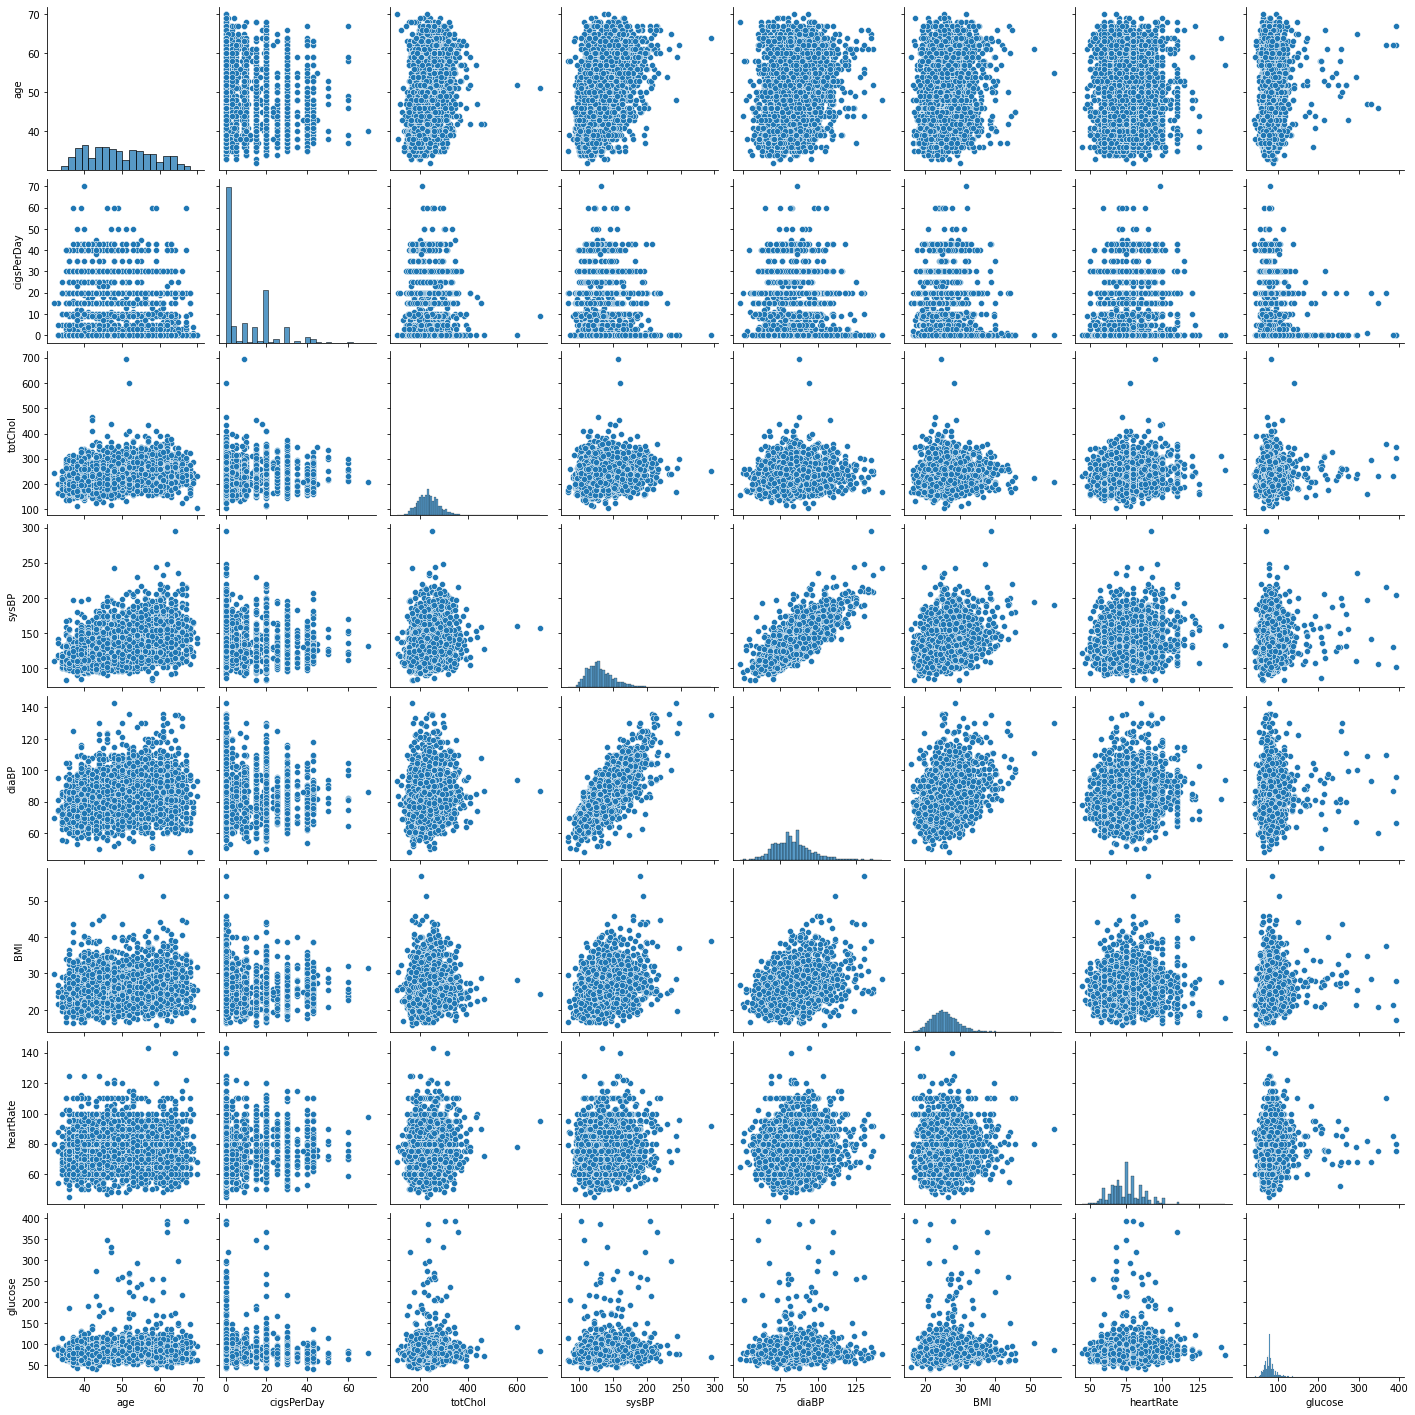

In [46]:
# Using pairplot to understand the dependence/ influence of feature on one another. 
sns.pairplot(df2[numerical_columns])

The above Pairplot explains bivariate analysis for all the numerical columns, we can understand that:
As cholestrol is low the systolic BP also remains low.
Systolic BP and diastolic BP have a positive relationship.
Most of the cases, less cholesterol means less glucose.
Diastolic BP, systolic BP and BMI have a slight positive relationship.

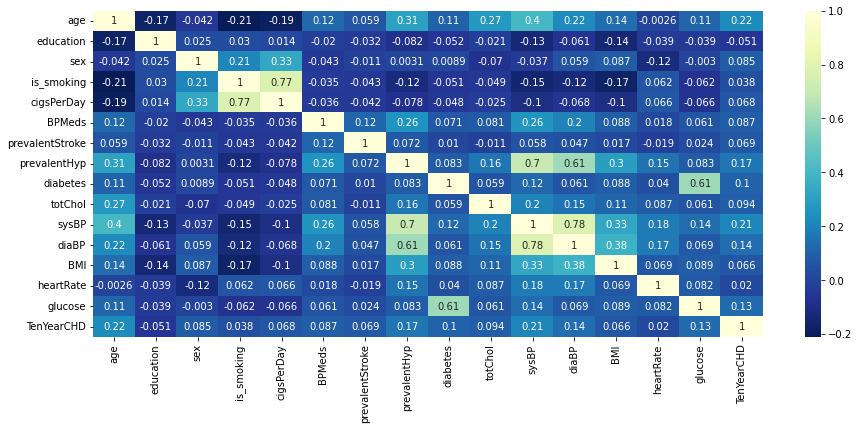

In [47]:
# Let us view the correlation between the features using a heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df2.corr(), annot = True, cmap="YlGnBu_r")

### **From this heatmap we can say the following about the data:**
1. Variables with high correlation (i.e. above 50%):
>
  1. "is_smoking" - "cigsPerDay" ==> This is the obvious correlation as the first one is a categorical variable while the second is a numerical one.
  2. "prevalentHyp" - "sysBP" ==> Hypertension is related to Systolic Blood Pressure.
  3. "prevalentHyp" - "diaBP" ==> Hypertension is related to Diastolic Blood Pressure.
  4. "diabetes" - "glucose" ==> This is the obvious correlation as the first one is a categorical variable while the second is a numerical one. 
  5. "sysBP" - "diaBP" ==> These two are highly correlated as both of them are blood pressures.
>

2. Systolic and Diastolic Blood Pressure does influence hypertension and BMI.
3. Systolic BP and age have a positive correleation.
4. Variables such as age, prevalent hypertension, systolic BP, diastolic BP, and glucose have lower but positive correlation with the dependent variable. Hence, we can say that it has influence on the risk of heart disease.
5. Education is the only variable negatively correlated with the dependent variable.

# Feature Engineering:



Here, we will make necessary changes to the variables to make the data ready for model training. We will add derived variables and drop the highly correlated variables.
1. "sysBP" and "diaBP" are highly correlated. According to the [article](https://www.healthline.com/health/pulse-pressure#:~:text=Pulse%20pressure%20is%20the%20difference,would%20be%2040%20mm%20Hg.) these two are linearily related variable hence we can convert them to a single variable "pulsePressure" and drop these two individual variables.
2. We will drop the 'is_smoking' variable, as it is categorical, it gives lesser information compared to the numerical variable "cigsPerDay".
3. "sex" is a categorical variable. So, we will create its dummy variable for the ease of analysis and We will drop this variable. Here, the dummy variables will be "sex_0" corresponding to 'Female' and "sex_1" corresponding to 'Male'.

In [48]:
# Adding pulse pressure as a column
df2['pulsePressure'] = df2['sysBP'] - df2['diaBP']

# Dropping the systolic and diastolic BP columns
df2.drop(['sysBP','diaBP'], axis = 1, inplace = True)

# Dropping the 'is_smoking' column
df2.drop('is_smoking', axis = 1, inplace = True)

# Creating dummy variables for 'sex'
df2 = pd.get_dummies(df2 , columns = ['sex'])

In [49]:
# Checking for the final list of variables after feature engineering.
df2.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'pulsePressure', 'sex_0', 'sex_1'],
      dtype='object')

# Dealing with Class Imbalance:
As we saw earlier that there is a huge class imbalance in the dependent variable (target variable), we will have to balance that for better model training.
So, for this we will use the 'SMOTE' (Synthetic Minority Oversampling Technique) to deal with this. This is a oversampling technique which will  balance the classes of dependent variable.

In [50]:
# Importing SMOTE for class balancing
from imblearn.over_sampling import SMOTE

In [51]:
# Creating an instance
smote = SMOTE()

Creating variables containing the dependent and independent features.

In [52]:
# Here, the feature 'TenYearCHD' is the dependent variable. Hence, listing out the dependent and independent variables for ease of analysis.
dependent_variable = ['TenYearCHD']

In [53]:
independent_variables = df2.columns.drop(dependent_variable)
independent_variables

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'pulsePressure', 'sex_0', 'sex_1'],
      dtype='object')

In [54]:
# Dividing data into independent (X) and dependent (y) variables
X = df2.loc[:, independent_variables]
y = df2[dependent_variable]

In [55]:
# Number of rows and columns of variables X and y
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns')
print(f'y has {y.shape[0]} rows')

X has 3390 rows and 14 columns
y has 3390 rows


In [56]:
# Using SMOTE technique to oversample the data
X,y = smote.fit_resample(X,y)

In [57]:
# Counts of each classes after oversampling is done
y.value_counts()

TenYearCHD
0             2879
1             2879
dtype: int64

In [58]:
# Number of rows in the dataset after oversampling is done
print(f'Number of rows in X is {len(X)}')
print(f'Number of rows in y is {len(y)}')

Number of rows in X is 5758
Number of rows in y is 5758


Now both the classes are of equal size and the predictions will not be biased.

In [59]:
# Viewing the data in variable 'X'
X

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,pulsePressure,sex_0,sex_1
0,64,2.000000,3.000000,0.0,0,0,0,221.000000,25.380000,90.000000,80.000000,63.000000,1,0
1,36,4.000000,0.000000,0.0,0,1,0,212.000000,29.770000,72.000000,75.000000,70.000000,0,1
2,46,1.000000,10.000000,0.0,0,0,0,250.000000,20.350000,88.000000,94.000000,45.000000,1,0
3,50,1.000000,20.000000,0.0,0,1,0,233.000000,28.260000,68.000000,94.000000,70.000000,0,1
4,64,1.000000,30.000000,0.0,0,0,0,241.000000,26.420000,70.000000,77.000000,51.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,49,1.535887,20.893145,0.0,0,0,0,243.357258,28.663185,86.250403,74.714516,42.428226,0,1
5754,48,2.946625,20.533754,0.0,0,0,0,193.266877,19.761916,89.733123,77.106751,66.412870,0,0
5755,58,2.832027,4.679730,0.0,0,0,0,289.664054,28.662654,85.000000,114.091825,72.793953,0,0
5756,64,3.606088,20.000000,0.0,0,1,0,274.313040,26.028442,69.393912,74.525216,58.181736,0,1


# Normalizing the data:

The data of each independent features has the values in different ranges. Hence, before training the model we will have to scale the data and bring all the values in the same range.
For this we will use the MinMaxScaler, a normalizing technique.

In [60]:
# Importing Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [61]:
# Creating an instance for MinMaxScaler
scaler = MinMaxScaler()

In [62]:
# Applying the MinMaxScaler to independent variables
X = scaler.fit_transform(X)

Now, our data is ready for model training.

# Model Training:

We will use these five models for prediction.
1. Logistic Regression
2. Random Forest
3. XGBoost Classifier
4. KNN Classifier
5. Support Vector Machine (SVM)

In [63]:
# Importing packages to split data into train and test
from sklearn.model_selection import train_test_split

# Importing libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [64]:
# Creating a dictionary for models
model_dict = {'Logistic Regression' : LogisticRegression(),
              'Random Forest' : RandomForestClassifier(),
              'XGB Classifier' : XGBClassifier(),
              'KNN' : KNeighborsClassifier(),
              'SVC' : SVC(probability=True)}

In [65]:
# Splitting the data for training and testing in 80% - 20% ratio. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [66]:
# Creating a function to train the model
def model_build(X_train, y_train, X_test, y_test, dict_model):
 
   # Creating a dataframe to store the data in tabular format
  model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 'Test F1 Score'])
  
  # Creating dictionaries of confusion matrix
  train_confusion_matrix = {}  
  test_confusion_matrix = {}  
  curve = {}
  
  
  # Building the model
  for n, m in dict_model.items():
    model = m                             # Assigning the model to variable. 
    model.fit(X_train, y_train)           # Fit the data to the model.
    train_preds = model.predict(X_train)  # Predicting for train dataset.
    test_preds = model.predict(X_test)    # Predicting on the test dataset.

    test_probs = model.predict_proba(X_test)  # Getting model test probability
    test_probs = test_probs[:,1]

    # Calculating the evaluation metrices
    train_accuracy = accuracy_score(y_train, train_preds) # Accuracy
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds) # Precision
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)   # Recall
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds) # ROC AUC Score
    test_roc_auc = roc_auc_score(y_test, test_preds)
    train_f1_score = f1_score(y_train, train_preds) # f1 Score
    test_f1_score = f1_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df = model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc,
                               'Train F1 Score' : train_f1_score,
                               'Test F1 Score' : test_f1_score}, ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds, labels = model.classes_)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds, labels = model.classes_)

    # Plot confusion matrix
    disp1 = ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix[n], display_labels = model.classes_)
    disp2 = ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix[n], display_labels = model.classes_)
    disp1.plot()
    disp2.plot()
    disp1.ax_.set_title(f'Train CM of {model}')
    disp2.ax_.set_title(f'Test CM of {model}')    
    plt.show()

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

  return model_df, train_confusion_matrix, test_confusion_matrix, curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


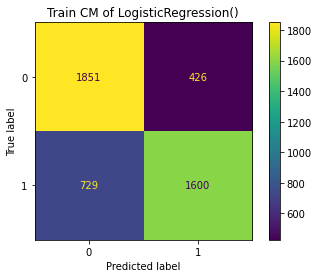

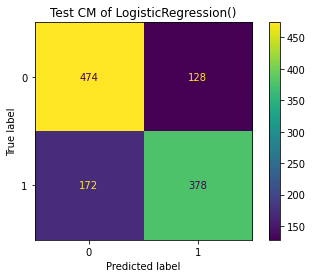

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


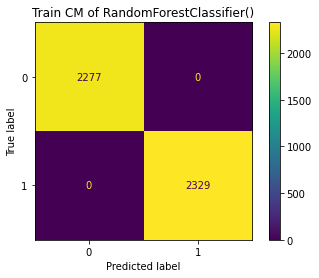

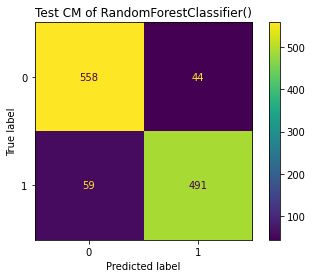

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


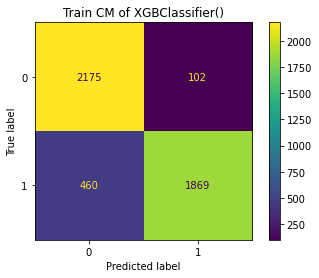

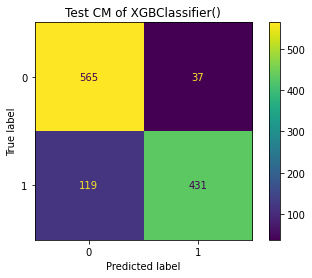

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


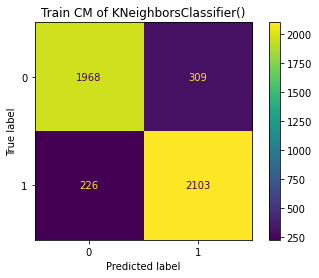

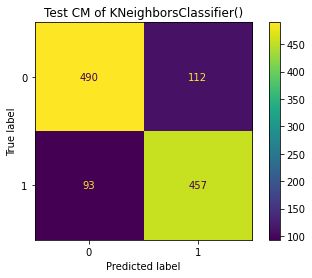

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


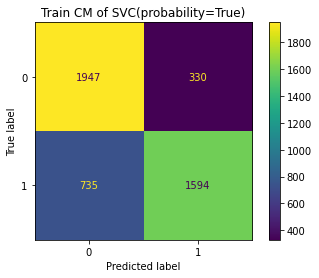

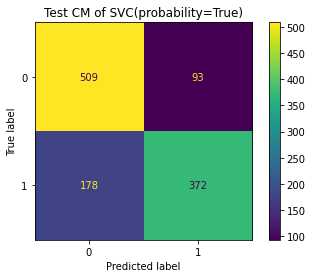

In [67]:
# Using the model function to understand the scores of different models
model_table, train_cm, test_cm, curve= model_build(X_train, y_train, X_test, y_test, model_dict)

In [68]:
# Models and their scores
model_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score
0,Logistic Regression,0.749240,0.739583,0.789733,0.747036,0.686990,0.687273,0.749951,0.737324,0.734788,0.715909
1,Random Forest,1.000000,0.910590,1.000000,0.917757,1.000000,0.892727,1.000000,0.909819,1.000000,0.905069
2,XGB Classifier,0.877985,0.864583,0.948250,0.920940,0.802490,0.783636,0.878847,0.861087,0.869302,0.846758
3,KNN,0.883847,0.822049,0.871891,0.803163,0.902963,0.830909,0.883629,0.822431,0.887155,0.816801
4,SVC,0.768780,0.764757,0.828482,0.800000,0.684414,0.676364,0.769743,0.760939,0.749589,0.733005


From this table we can say that:
1. RandomForest model out performs all the models when it comes to training. Also, the value of all the metrices are farely high while testing the model. However, if we compare the train vs test metrices, we see that somewhere, there is a slight occurance of overfitting. We may consider hyperparameter tuning on this to improve the test results.
2. The second best model appaers to be the XG Boost Classifier. Presently it appears to have optimal fit as the test and train metrices have the same value. Hence, it is highly preferable to perform better after hyper parameter tuning.
3. Logistic regression and SVC/ SVM are performing well, however, accuracy and recall for these are quite lower. Hence, we may not work upon improving these models.
4. KNN does appear to have fine train metrices however, it doesnot quite really perform well for the test dataset. Hence, it also might have some degree of overfitting. So we will not consider it for further improvement.

Just these metrices are not enough to direct our focus on a specific model for hyperparameter tuning. So, lets have a look at the confusion matrix of each model.

In [69]:
# Train confusion matrix
for name, matrix in train_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[1851  426]
 [ 729 1600]]
********************
Model : Random Forest
[[2277    0]
 [   0 2329]]
********************
Model : XGB Classifier
[[2175  102]
 [ 460 1869]]
********************
Model : KNN
[[1968  309]
 [ 226 2103]]
********************
Model : SVC
[[1947  330]
 [ 735 1594]]
********************


In [70]:
# Test confusion matrix
for name, matrix in test_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[474 128]
 [172 378]]
********************
Model : Random Forest
[[558  44]
 [ 59 491]]
********************
Model : XGB Classifier
[[565  37]
 [119 431]]
********************
Model : KNN
[[490 112]
 [ 93 457]]
********************
Model : SVC
[[509  93]
 [178 372]]
********************


Observation from confusion matrix:\
The performance of a model become critical to evaluate in case of classification problems when the minority classes are present in the data. Hence, we need to focus on the amount of False Negatives generated by the model. Looking at the count of Flase Negatives, the best model are in decreasing order of performance are Random Forest, KNN, XGB.


Text(0.5, 1.0, 'ROC CURVE')

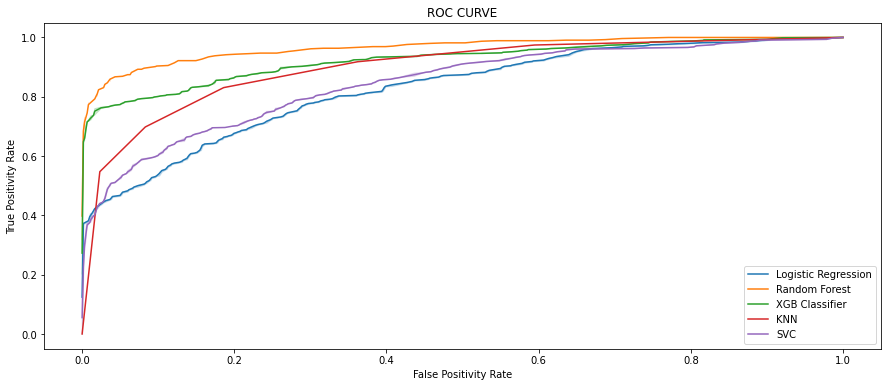

In [71]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

From the above ROC Curve graph we can say that Random Forest has a better prformance compared to all the other models. The next one on follow Random Forest is XGB Classifier.

# Hyperparameter Tuning:
From the model building section we can understand the best models are Random Forest and XGB Classifier. Between these two, Random Forest is overfitting to some extent compared to other models. XGB Classifier is the second best performer, hence this will be chosen for hyperparameter tuning.

In [72]:
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [73]:
# Creating a function for hyperparameter tuning
def grid_fitting(name, hyperparams, estim):
  
  grid_df = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 'Test F1 Score'])

  grid = GridSearchCV(estimator= estim, param_grid = hyperparams, cv = 5, scoring = 'recall') # Instance of GridSearchCV

  grid.fit(X_train,y_train) # Fit the model

  best_model = grid.best_estimator_ # Getting the best estimator

  train_grid = best_model.predict(X_train)  # Predict for Training set
  test_grid = best_model.predict(X_test)  # Predict for Test set

  grid_train_accuracy = accuracy_score(y_train, train_grid) # Accuracy Score
  grid_test_accuracy = accuracy_score(y_test, test_grid)
  grid_train_precision = precision_score(y_train, train_grid) # Precision
  grid_test_precision = precision_score(y_test, test_grid)
  grid_train_recall = recall_score(y_train, train_grid) # Recall
  grid_test_recall = recall_score(y_test, test_grid)
  grid_train_roc_auc = roc_auc_score(y_train, train_grid) # ROC AUC Score
  grid_test_roc_auc = roc_auc_score(y_test, test_grid)
  grid_train_f1_score = f1_score(y_train, train_grid) # f1 Score
  grid_test_f1_score = f1_score(y_test, test_grid)

  grid_df = grid_df.append({'Model': name,        # Append the data to list
                           'Train Accuracy' : grid_train_accuracy,
                           'Test Accuracy': grid_test_accuracy,
                           'Train Precision' : grid_train_precision,
                           'Test Precision' : grid_test_precision,
                           'Train Recall' : grid_train_recall,
                           'Test Recall' : grid_test_recall,
                           'Train ROC AUC' : grid_train_roc_auc,
                           'Test ROC AUC' : grid_test_roc_auc,
                            'Train F1 Score' : grid_train_f1_score,
                            'Test F1 Score' : grid_test_f1_score}, ignore_index = True)
  
  grid_train_cm = confusion_matrix(y_train, train_grid) # Getting the confusion matrix
  grid_test_cm = confusion_matrix(y_test, test_grid)


  return best_model, grid_df, grid_train_cm, grid_test_cm

In [74]:
# Hyperparameter dictionary
xgb_param_dict ={'n_estimators' : [300,350],
                'max_depth': [7,8,9],
                'learning_rate': [0.01, 0.001]
                 }

In [75]:
# Apply the function to tune the parameters
xgb_best_model, xgb_df, xgb_grid_train_cm, xgb_grid_test_cm = grid_fitting('XGB', xgb_param_dict, XGBClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

In [76]:
# Calling the best estimators of the model
xgb_best_model

XGBClassifier(learning_rate=0.01, max_depth=9, n_estimators=350)

In [77]:
# Dataframe showing the scores of the model after hyperparameter tuning
xgb_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score
0,XGB,0.959618,0.87934,0.982875,0.903733,0.936453,0.836364,0.959882,0.877484,0.959103,0.868744


In [78]:
# Confusion matrix of training data after hyperparameter tuning
xgb_grid_train_cm

array([[2239,   38],
       [ 148, 2181]])

In [79]:
# Confusion matrix of test data after hyperparameter tuning
xgb_grid_test_cm

array([[553,  49],
       [ 90, 460]])

As we can see the hyperparameter tuning has improved the model from the base XGBoost Classifier especially for recall, the parameter we are focusing on.
SHAP will help increase model explainability and enchance our predictions

In [80]:
# Incase the code below this point doesn't work. Run this code block
!pip install -q shap

     |████████████████████████████████| 569 kB 5.1 MB/s 


In [81]:
# Importing SHAP
import shap

In [82]:
# Creating instances of shap
explainer = shap.TreeExplainer(xgb_best_model)
shap_values = explainer.shap_values(X_test)

In [83]:
# As X_test is an array without column names we will build a dataframe
shap_df = pd.DataFrame(X_test, columns = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'pulsePressure', 'sex_F', 'sex_M'])

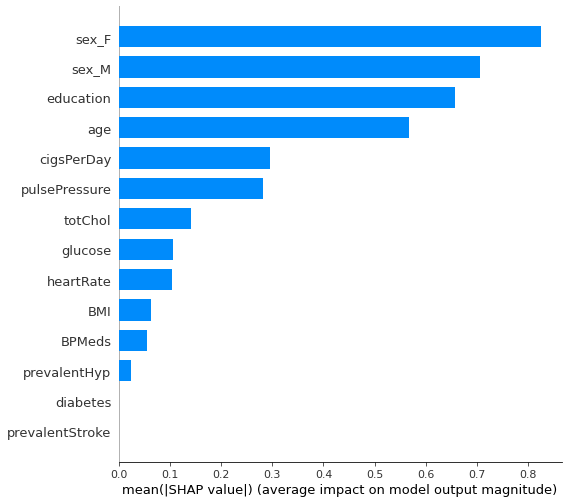

In [84]:
# SHAP Summary Plot
shap.summary_plot(shap_values, shap_df, plot_type = 'bar')

From the above graph we can say that:
1. Gender, education and age are the main features which help us classify the risk of CHD.
2. Looking at the fetures related to medical condition or medical history, we could say that they have about 10% influence on the Risk of CHD; which is quite less or insignificant.
3. Ciggerates per day and Blood Pressure (difference of SysBP and DisBP) influences the CHD variable by about 30%.

# Final Observation and Conclusion:

Keeping the accuracy and performance of Confusion Matrix, performance metrices value (Accuracy, Precision, Recall) and ROC Curve we could say that XGBoost model performed the best as it did not overfit the data as much as done by the Random Forest model.

We did hyperparameter tuning on XGB to improve its performance. The overall model performance was not improved, however, the Recall value did improve. Which is an indication that we succeeded in reducing the False Negative counts.

Later on we use SHAP method to know the feature importances. We could deduce that gender, education and age appear to be the major influencers. Compared to other medical features, ciggerates per day and Blood Pressure played a significant role with about 30% influence on the dependent variable. Here, it is a bit consufing to relate education with health. However, if enough data is available we could deduce if the students of certain educational background do fall victim of this. To get a better understandind of the dependence of this feature on the Risk factor, we must consult a domain expert and gather more data. This could be another research in itself.

We could further improve the model performance by further fine tuning the hyperparameters where we could seek help from an expert with excellent domain knowledge.